# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Maersyifaa Macira Balqis Abdul Gopur
- **Email:** maersyifaamacira1@gmail.com
- **ID Dicoding:** maersyifaa

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan peminjaman sepeda dalam kurun waktu 1 tahun
- Pengaruh cuaca terhadap jumlah peminjaman sepeda


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import calendar

## Data Wrangling

### Gathering Data

Memuat data dari tabel "day"

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/maersyifaaa/Proyek-Analisis-Data/main/dataset/day.csv")
day_df.head(365)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,1,0,12,0,3,1,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


### Assessing Data

memeriksa tipe data dari kolom yang terdapat dalam day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


menampilkan informasi terkait jumlah missing values pada day_df

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memeriksa duplikasi data dalam day_df

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


menampilkan ringkasan parameter statistik

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


melihat jumlah baris dan kolom

In [ ]:
print(day_df.shape)

(731, 16)


### Cleaning Data

mengubah tipe data pada kolom dteday menjadi datetime.

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

memastikan tipe data sudah berubah

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

melakukan pemetaan nilai hari

In [ ]:
day_df['weekday'] = day_df['dteday'].dt.strftime('%A')

memastikan perubahan nama hari sudah berhasil

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


melakukan pemetaan nilai bulan

In [ ]:
day_df['mnth'] = day_df['dteday'].dt.strftime('%B')

memastikan perubahan nama bulan sudah berhasil

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


melakukan pemetaan nilai musim

In [ ]:
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

day_df['season'] = day_df['season'].replace(season_mapping)

memastikan perubahan nama musim sudah berhasil

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


melakukan pemetaan nilai tahun

In [ ]:
day_df['yr'] = day_df['dteday'].dt.year

memastikan pemetaan berhasil

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Jumlah Peminjam Sepeda

Menampilkan tipe data dari tiap kolom

In [ ]:
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

melihat rangkuman parameter statistik dari data day_df

In [ ]:
day_df.describe(include="all")

<ipython-input-477-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Summer,NaN,January,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


melihat persebaran jumlah peminjam sepeda berdasarkan season/ musim

In [ ]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
Summer    188
Spring    182
Winter    179
Fall      176
Name: cnt, dtype: int64

melihat persebaran jumlah peminjam sepeda berdasarkan bulan

In [ ]:
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False)

mnth
August       62
December     62
January      62
July         62
May          62
October      62
April        60
June         60
March        60
November     60
September    60
February     57
Name: cnt, dtype: int64

melihat persebaran jumlah peminjam sepeda berdasarkan tahun

In [ ]:
day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

yr
2012    356
2011    352
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan peminjaman sepeda dalam kurun waktu 1 tahun

In [ ]:
# Mengubah kolom 'dteday' menjadi indeks
day_df.set_index('dteday', inplace=True)

# Membuat DataFrame bulanan 'month_df'
month_df = day_df.groupby(pd.Grouper(freq='M')).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

month_df.head(12)

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821
2011-06-30,30612,112900,143512
2011-07-31,36452,104889,141341
2011-08-31,28842,107849,136691
2011-09-30,26545,100873,127418


In [ ]:
month_df.index = month_df.index.strftime('%b-%Y')

In [ ]:
month_df.head(12)

,casual,registered,cnt
dteday,,,
Jan-2011,3073,35116,38189
Feb-2011,6242,41973,48215
Mar-2011,12826,51219,64045
Apr-2011,22346,72524,94870
May-2011,31050,104771,135821
Jun-2011,30612,112900,143512
Jul-2011,36452,104889,141341
Aug-2011,28842,107849,136691
Sep-2011,26545,100873,127418


In [ ]:
month_df = month_df.reset_index()

In [ ]:
month_df = month_df.rename(columns={'dteday': 'monthyr'})

In [ ]:
month_df.head(12)

,monthyr,casual,registered,cnt
0,Jan-2011,3073,35116,38189
1,Feb-2011,6242,41973,48215
2,Mar-2011,12826,51219,64045
3,Apr-2011,22346,72524,94870
4,May-2011,31050,104771,135821
5,Jun-2011,30612,112900,143512
6,Jul-2011,36452,104889,141341
7,Aug-2011,28842,107849,136691
8,Sep-2011,26545,100873,127418
9,Oct-2011,25222,98289,123511


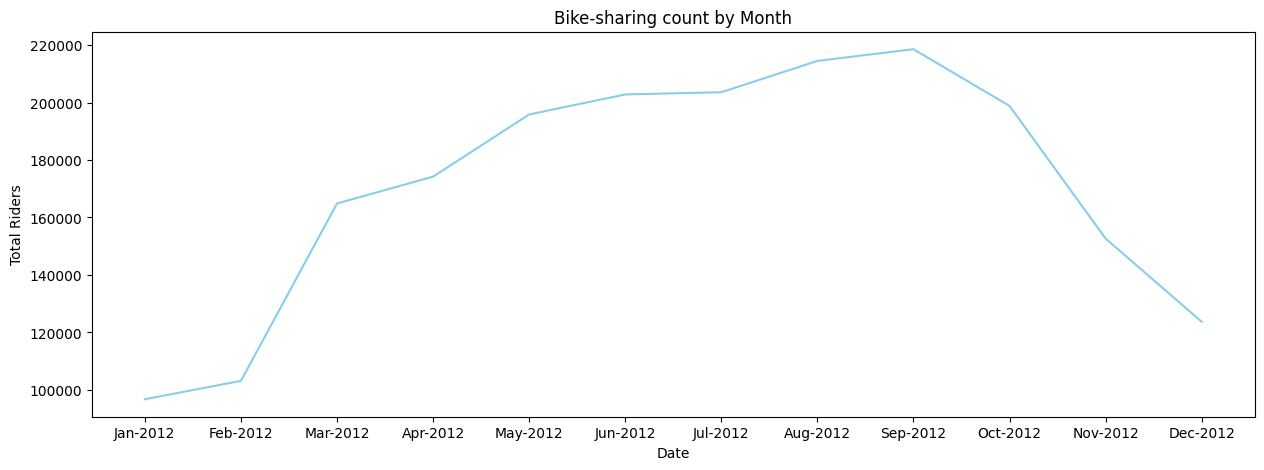

In [ ]:
plt.figure(figsize=(15,5))

# Membuat DataFrame dari data
df = pd.DataFrame(month_df)

# Memotong DataFrame untuk hanya menggunakan 12 bulan terakhir
df_last_12_months = df[-12:]

# Membuat histogram
plt.plot(df_last_12_months['monthyr'], df_last_12_months['cnt'], color='skyblue')

# Memberi judul dan label sumbu
plt.title('Bike-sharing count by Month')
plt.xlabel('Date')
plt.ylabel('Total Riders')

# Menampilkan plot
plt.show()

### Pertanyaan 2: Pengaruh cuaca terhadap jumlah peminjaman sepeda

In [ ]:
season_df = day_df.groupby('season').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

season_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [ ]:
season_df = season_df.reset_index()

In [ ]:
season_df.head()

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


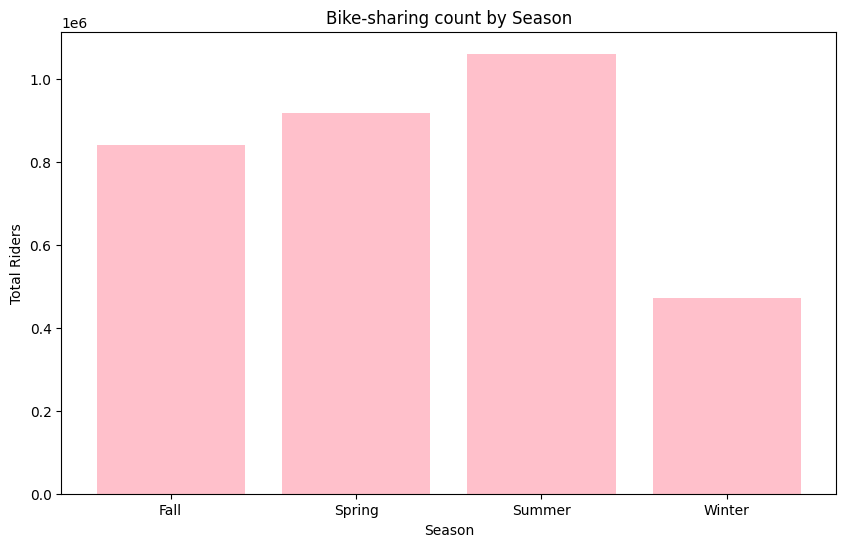

In [ ]:
plt.figure(figsize=(10,6))

# Membuat DataFrame dari data
df = pd.DataFrame(season_df)

# Membuat histogram
plt.bar(df['season'], df['cnt'], color='pink')

# Memberi judul dan label sumbu
plt.title('Bike-sharing count by Season')
plt.xlabel('Season')
plt.ylabel('Total Riders')


# Menampilkan histogram
plt.show()

In [ ]:
day_df.to_csv("cleaned_day.csv", index=False)

## Conclusion

- Peminjaman sepedea meningkat dari bulan Januari dan berada pada puncaknya pada bulan September kemudian kembali menurun
- Peminjaman sepeda terjadi paling banyak pada musim panas dan paling sedikit pada musim dingin